In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
import itertools
from mlxtend.plotting import plot_decision_regions

In [ ]:
clf1 = LogisticRegression(random_state=0, solver = 'lbfgs', multi_class='auto')

In [ ]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
clf3= SVC(kernel='rbf', probability=True, gamma ='auto')

In [ ]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights = [2,1,1], voting = 'soft',)

In [ ]:
X, y =iris_data()

In [ ]:
X = X[:, [0,2]]

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
gs = gridspec.GridSpec(2,2)

In [ ]:
fig = plt.figure(figsize=(20,16))

<Figure size 2000x1600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


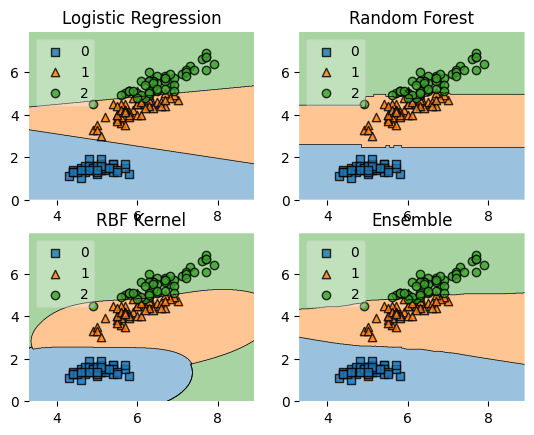

In [ ]:
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],['Logistic Regression','Random Forest', "RBF Kernel","Ensemble"],itertools.product([0,1],repeat=2)):
  clf.fit(X,y)
  ax = plt.subplot(gs[grd[0],grd[1]])
  fig = plot_decision_regions(X=X, y=y, clf=clf, legend =2)
  plt.title(lab)
plt.show()

<Axes: >

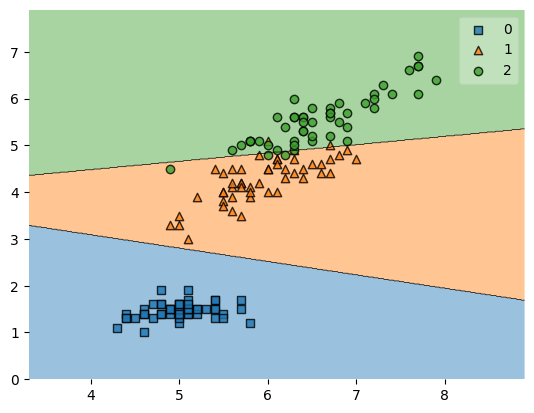

In [ ]:
plot_decision_regions(X=X, y=y, clf =clf1)

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=600, centers =5, cluster_std=0.6, random_state=42)

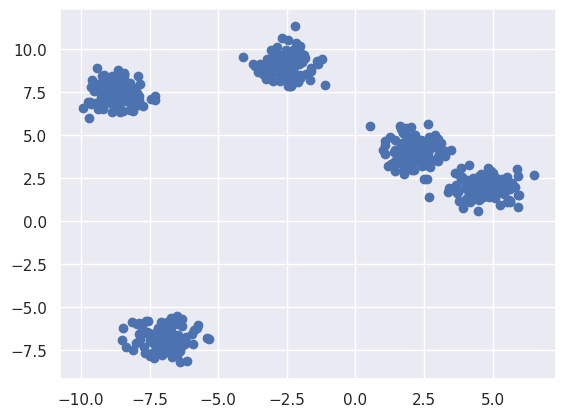

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,ward

In [ ]:
np.set_printoptions(precision =4, suppress = True)

In [ ]:
distance = linkage(X, 'ward')

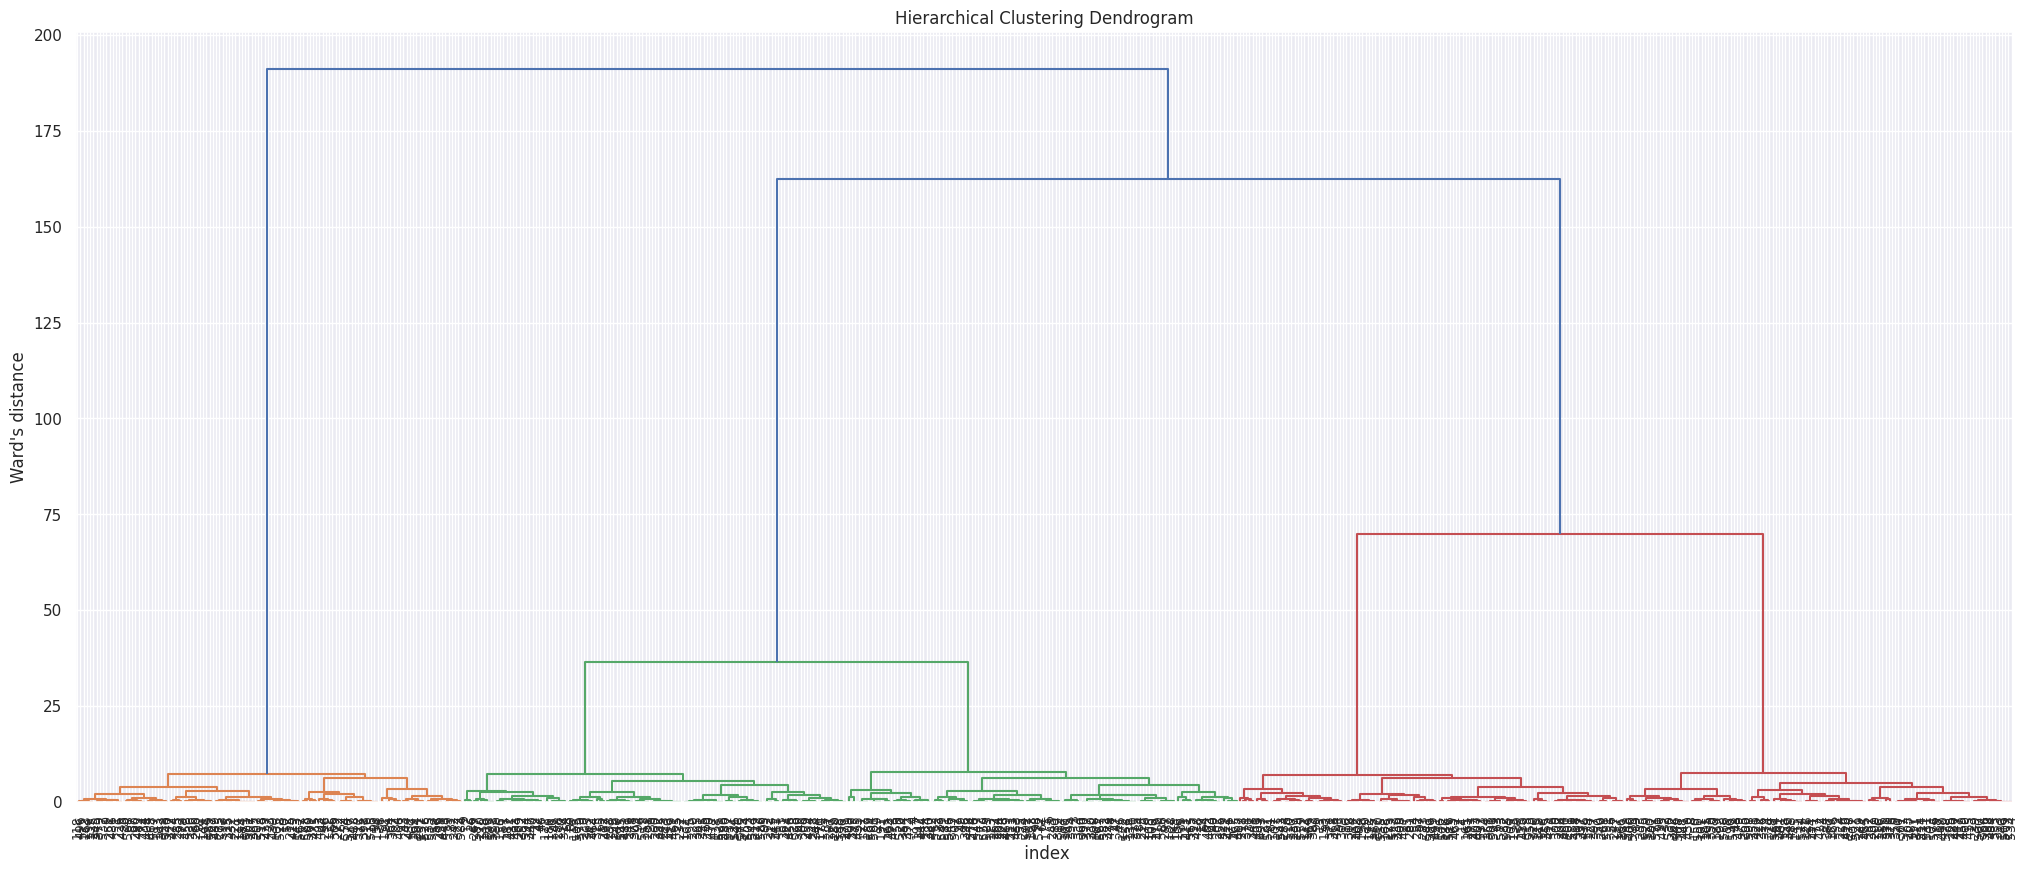

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel(" index")
plt.ylabel("Ward's distance")
dendrogram(distance, leaf_rotation =90, leaf_font_size=9)
plt.show()

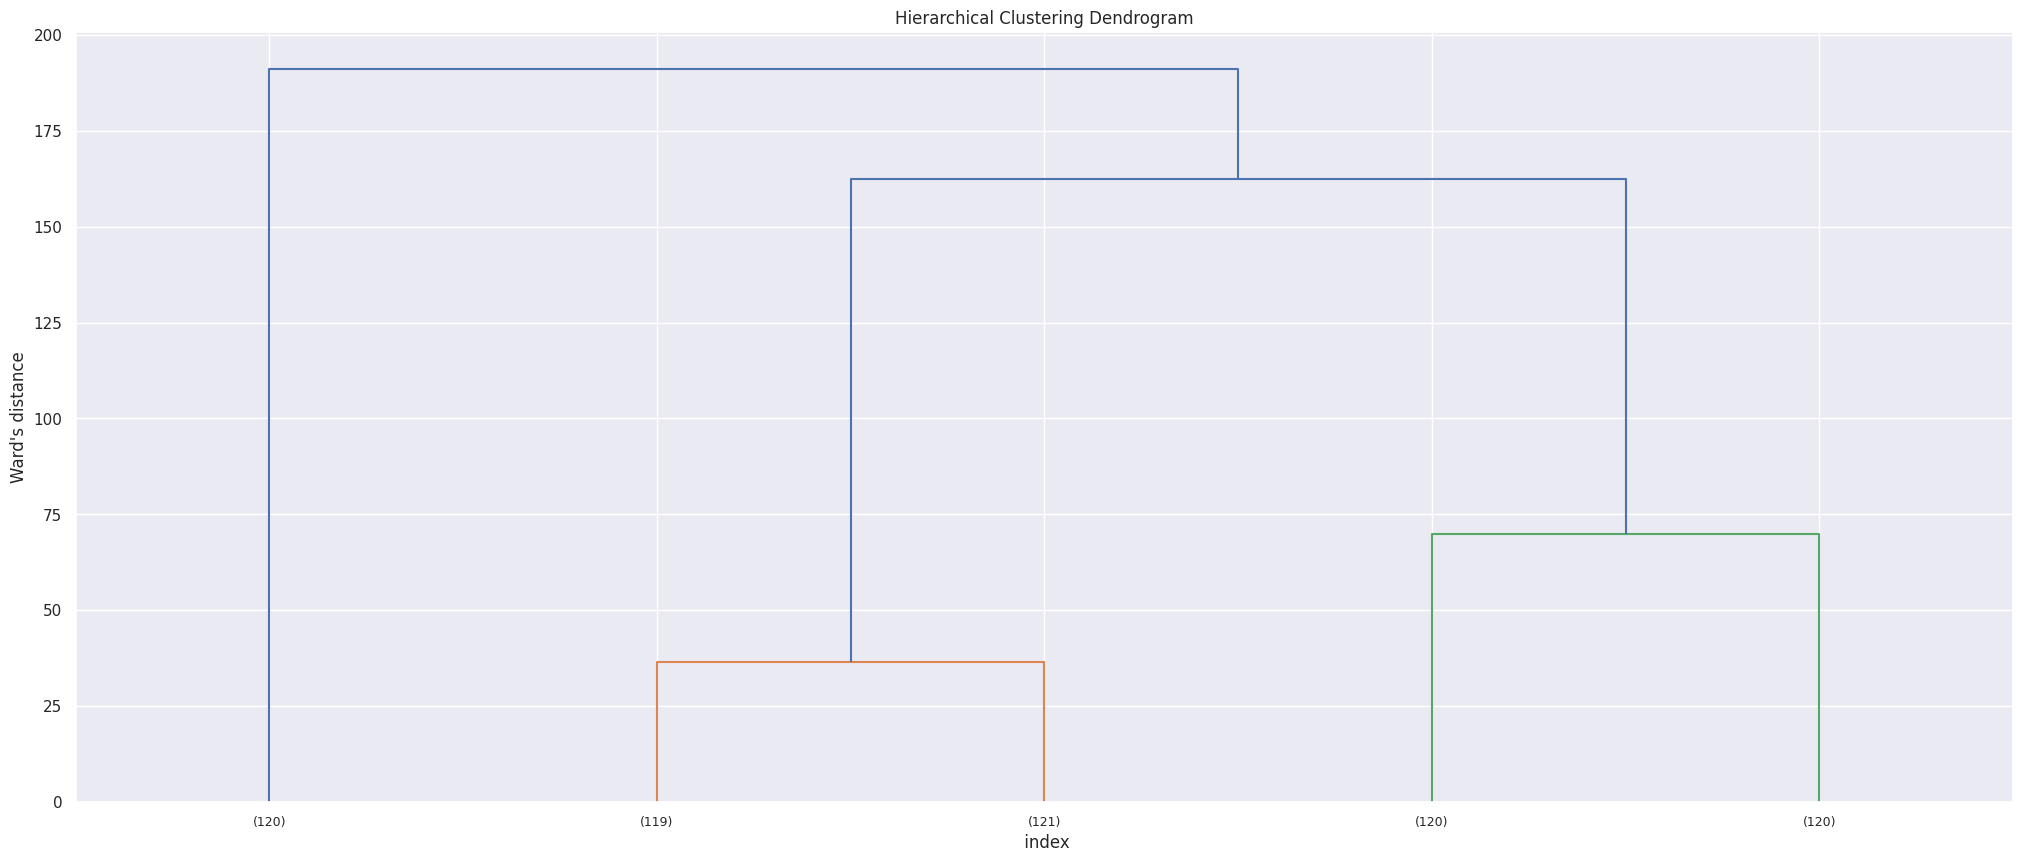

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel(" index")
plt.ylabel("Ward's distance")
dendrogram(distance, truncate_mode ='lastp', p=5,leaf_rotation =0, leaf_font_size=9)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
max_d = 100
clusters = fcluster(distance, max_d, criterion = 'distance')

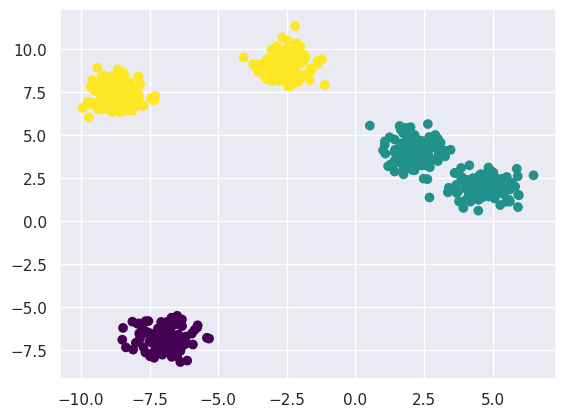

In [ ]:
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.show()